<a href="https://colab.research.google.com/github/Loubna-saadi/MNIST_Classification/blob/main/first_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Étape 1 : Importer les Bibliothèques Nécessaires**
Tout d'abord, importons TensorFlow et d'autres bibliothèques nécessaires :

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt



# Étape 2 : Charger le Dataset MNIST et Visualiser les Données

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


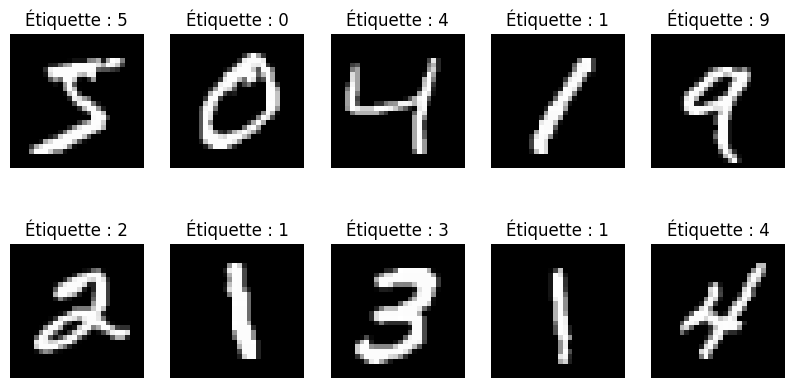

In [5]:
# Charger la base de données MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Afficher quelques images du dataset
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Étiquette : {y_train[i]}")
    plt.axis("off")
plt.show()



# Étape 3 : Prétraiter les Données

On normalise les valeurs des pixels et on les reformate pour être compatibles avec un CNN.

In [6]:
# Normaliser les images (convertir les valeurs de 0-255 à 0-1)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Ajouter une dimension pour le canal de couleur (grayscale → 1 canal)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convertir les labels en one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Étape 4 :  Créer le modèle CNN avec Keras
On construit un réseau de neurones convolutifs pour classifier les chiffres.

In [7]:
# Définir le modèle CNN
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")  # 10 classes (0-9)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Etape 5:Compiler et entraîner le modèle
On compile le modèle et on l'entraîne sur nos données.



In [8]:
# Compiler le modèle
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Entraîner le modèle
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=10, batch_size=32)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 37ms/step - accuracy: 0.8709 - loss: 0.4109 - val_accuracy: 0.9819 - val_loss: 0.0538
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9744 - loss: 0.0880 - val_accuracy: 0.9896 - val_loss: 0.0333
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9810 - loss: 0.0624 - val_accuracy: 0.9876 - val_loss: 0.0351
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 38ms/step - accuracy: 0.9854 - loss: 0.0468 - val_accuracy: 0.9915 - val_loss: 0.0253
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.9883 - loss: 0.0377 - val_accuracy: 0.9921 - val_loss: 0.0259
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9903 - loss: 0.0319 - val_accuracy: 0.9916 - val_loss: 0.0275
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.9908 - loss: 0.0282 - val_accuracy: 0.9917 - val_loss: 0.0280
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.9918 -

# Etape 6: Évaluer le modèle

In [9]:
# Évaluer le modèle sur les données de test
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Précision sur l’ensemble de test : {accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9908 - loss: 0.0321
Précision sur l’ensemble de test : 99.28%


# Etape 7: Faire des prédictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


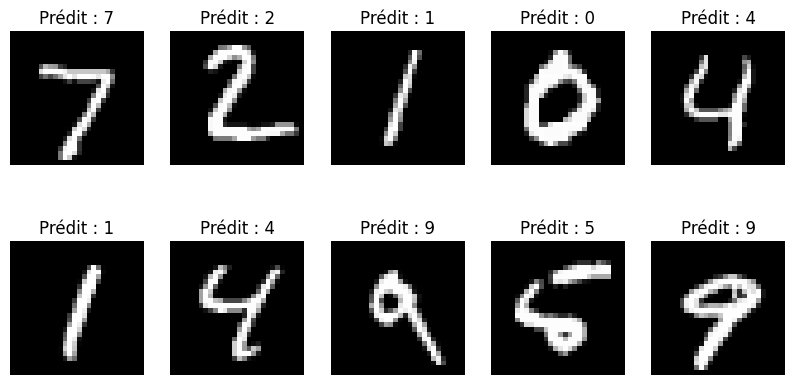

In [10]:
# Afficher quelques prédictions
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap="gray")

    # Prédire la classe
    prediction = np.argmax(model.predict(X_test[i].reshape(1,28,28,1)))

    plt.title(f"Prédit : {prediction}")
    plt.axis("off")
plt.show()
